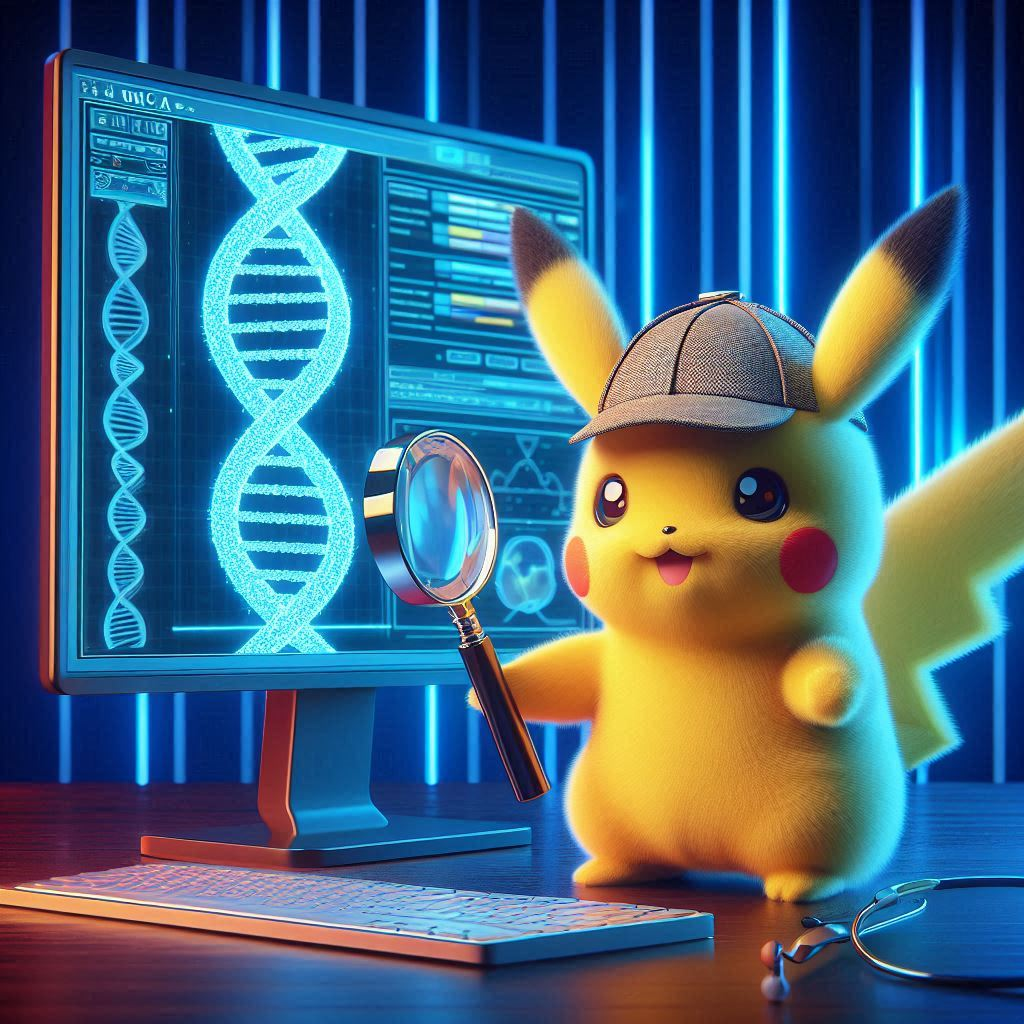
**Bioinformatics Night!**

**Analyzing Text Data and Tags Frequencies:**

This Python code snippet demonstrates a workflow for preprocessing and analyzing text data and associated tags. Here's a step-by-step explanation:

**Data Loading and Preprocessing:**

The code begins by loading training and validation data files (assumed to be in tab-separated format) using a function read_data(filename) that reads and cleans the data, converting the 'tags' column into a list format.
Text Preparation:

A function text_prepare(text) is defined to normalize and clean text data. It converts text to lowercase, removes special characters and symbols, and filters out English stopwords using regex and NLTK libraries.

**Applying Text Preparation:**

The text_prepare function is applied to both training and validation data sets (X_train and X_val). This prepares the text data by removing noise and standardizing the format, making it suitable for further analysis.

**Word Frequency Analysis:**

Word frequencies are then counted using Python's Counter class from the collections module. This counts how often each word appears in the cleaned training data (words_counts).
Visualization:

The top 10 most frequent words and their occurrences are visualized using a bar plot (sns.barplot). This plot helps in understanding which words are most prevalent in the dataset after preprocessing.
Tag Frequency Analysis:

Similarly, the code counts the frequencies of tags (assumed to be categorical labels) in the training data (tags_counts). This gives insight into which tags appear most frequently in the dataset.

**Visualization of Tags:**

The top 10 most frequent tags are visualized using another bar plot. This plot helps in understanding the distribution of tags in the dataset, which is crucial for tasks like classification or tagging.

**Educational Context:**

This code snippet serves as a practical introduction to text data preprocessing, including techniques for cleaning, normalization, and frequency analysis. It also introduces basic data visualization techniques to understand the distribution of words and tags in a dataset.

**Key Concepts:** Data preprocessing, text cleaning, normalization, frequency analysis, data visualization.



In [1]:
#@title Step 1: This script imports various libraries necessary for data processing, text analysis, and machine learning tasks.

# from nltk.corpus import stopwords: Imports the stopwords list from the Natural Language Toolkit (NLTK), which is useful for text preprocessing to remove common words that do not contribute much to the meaning (e.g., "and", "the").
# import nltk: Imports the main NLTK library, which is a leading platform for building Python programs to work with human language data.
# import pandas as pd: Imports the pandas library, which provides data structures and data analysis tools.
# import numpy as np: Imports the NumPy library, which supports large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
# import seaborn as sns: Imports the Seaborn library, which is used for making statistical graphics.
# import matplotlib.pyplot as plt: Imports the Matplotlib library, specifically the pyplot module, for creating static, animated, and interactive visualizations.
# from ast import literal_eval: Imports the literal_eval function from the Abstract Syntax Trees (AST) module, which safely evaluates an expression node or a string containing a Python literal or container display.
# import re: Imports the regular expressions library for string manipulation and pattern matching.
# from collections import Counter: Imports the Counter class from the collections module, which is used to count hashable objects.
# from itertools import chain: Imports the chain function from the itertools module, which is used to chain together multiple iterables.
# from sklearn.feature_extraction.text import CountVectorizer: Imports the CountVectorizer from scikit-learn, which converts a collection of text documents to a matrix of token counts.
# from sklearn.feature_extraction.text import TfidfVectorizer: Imports the TfidfVectorizer from scikit-learn, which converts a collection of raw documents to a matrix of TF-IDF features.
# from sklearn.preprocessing import MultiLabelBinarizer: Imports the MultiLabelBinarizer from scikit-learn, which is used for binarizing labels in a multilabel format.
# from sklearn.multiclass import OneVsRestClassifier: Imports the OneVsRestClassifier from scikit-learn, which is a strategy for multiclass classification.
# from sklearn.linear_model import LogisticRegression, RidgeClassifier: Imports the LogisticRegression and RidgeClassifier from scikit-learn, which are algorithms used for classification tasks.
# from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score, recall_score: Imports various performance metrics from scikit-learn to evaluate the classification models.
# nltk.download('stopwords'): Downloads the stopwords list from NLTK, ensuring that the latest version is available.
# %matplotlib inline: A magic function in Jupyter notebooks to display Matplotlib plots inline, directly below the code cell that produces them.

# Importing libraries
from nltk.corpus import stopwords
import nltk
#import stopwords
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
import re
from collections import Counter
from itertools import chain
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
#from metrics import roc_auc
from sklearn.metrics import roc_auc_score, average_precision_score, recall_score
nltk.download('stopwords') # caso a lista esteja desatualizada
%matplotlib inline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#@title Step 2: Function to read and clean tab-separated data file, converting 'tags' column to list

# criando a função
def read_data(filename):

    # importando o arquivo
    data = pd.read_csv(filename, sep='\t')

    # removendo as aspas que são importadas juntas
    data['tags'] = data['tags'].apply(literal_eval)

    # retornando o arquivo
    return data

In [3]:
#@title Step 3: Importing and cleaning training and validation data files, with specified file paths for each dataset
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd

# importando os dados de treino
train = read_data('/content/drive/MyDrive/hands/teste-02.tsv')
#train = read_data('data/train.tsv')
#train = read_data('/content/drive/MyDrive/Futuros sustentáveis/CURSO_CABANAnet_2024/IA/Hands On/train.tsv')
#train = read_data('/content/sample_data/california_housing_train.csv')
# importando os dados de validação
#validation = read_data('data/validation.tsv')
validation = read_data('/content/drive/MyDrive/hands/teste-01.tsv')
#validation = read_data('/content/drive/MyDrive/Futuros sustentáveis/CURSO_CABANAnet_2024/IA/Hands On/validation.tsv')

Mounted at /content/drive


In [4]:
#@title Step 4: Displaying the first 5 rows of the training dataset

# visualizando as primeiras 5 linhas do conjunto de treino
train.head()

title  \
0               Uma Noite No Museu   
1                Se Beber Nao Case   
2  Transformers: A Era Da Extincao   
3                         Deadpool   
4                         A Cabana   

                                                tags  
0  [ficcao, comedia, cotidiano, contos, educacional]  
1              [comedia, adulto, drogas, cotididano]  
2              [ficcao, ciencia, astronomia, guerra]  
3                [comedia, poderes, ciencia, adulto]  
4  [cotidiano, religioso, veridico, contos, educa...

In [5]:
#@title Step 5: Displaying the first 5 rows of the validation dataset

# visualizando as primeiras 5 linhas do conjunto de validação
validation.head()

title  \
0               Uma Noite No Museu   
1                Se Beber Nao Case   
2  Transformers: A Era Da Extincao   
3                         Deadpool   
4                         A Cabana   

                                                tags  
0          [ficcao, comedia, cotidiano, educacional]  
1               [comedia, adulto, drogas, cotidiano]  
2              [ficcao, ciencia, astronomia, guerra]  
3                [comedia, poderes, ciencia, adulto]  
4  [cotidiano, religioso, veridico, educacional, ...

In [6]:
#@title Step 6: Displaying the dimensions of the training and validation datasets
# visualizando as dimensões dos dados de treino
print(f"Os dados de TREINO possui:")
print(f"{train.shape[0]} linhas")
print(f"{train.shape[1]} colunas\n")
# visualizando as dimensões dos dados de treino
print(f"Os dados de VALIDAÇÃO possui:")
print(f"{validation.shape[0]} linhas")
print(f"{validation.shape[1]} colunas")


Os dados de TREINO possui:
7 linhas
2 colunas

Os dados de VALIDAÇÃO possui:
7 linhas
2 colunas


In [7]:
#@title Step 7: Splitting the training and validation data into features (X) and labels (y)

# separando os dados de treino
X_train, y_train = train['title'].values, train['tags'].values
# separando os dados de validação
X_val, y_val = validation['title'].values, validation['tags'].values


In [8]:
#@title Step 8: Creating objects to remove special characters and symbols, and preparing a function to clean and normalize text data

# criando os objetos com as expressões regulares
remove_espec_carac = re.compile('[/(){}\[\]\|@,;]')
remove_symb = re.compile('[^0-9a-z #+_]')
# criando um objeto para remoção de stopwords no idioma ingles
stopwords = stopwords.words('english')
# criando a função
def text_prepare(text):

    # normalizando nosso texto em letras minúsculas, assim facilita nossa preparação
    text = text.lower()

    # substituindo caracteres especiais por espaços em branco
    text = remove_espec_carac.sub(' ', text)

    # retornando apenas letras e números
    text = remove_symb.sub('', text)

    # removendo as stopwords
    text = ' '.join(word for word in text.split() if word not in stopwords)

    # retornando o texto modificado
    return text

In [9]:
#@title Step 9: Testing the function for cleaning and normalizing text data/content/drive/MyDrive/curso_cabananet_2024/IA/Hands On/validation.tsv

# Criando a função
def test_text_prepare():

    # definindo os exemplos
    examples = ["SQL Server - any equivalent of Excel's CHOOSE function?",
                "How to free c++ memory vector<int> * arr?"]

    # inserindo a resposta correta
    answers = ["sql server equivalent excels choose function",
               "free c++ memory vectorint arr"]

    # Aplicando um loop e comparando a limpeza
    for ex, ans in zip(examples, answers):

    # condições para retornar se o resultado foi aprovado ou reprovado
        if text_prepare(ex) != ans:
            return "Resposta incorreta para: '%s'" % ex
    return 'Basic Tests Approved!.'
# rodando a função de teste
print(test_text_prepare())

Basic Tests Approved!.


In [10]:
#@title Step 10: Applying the function to clean and normalize the training and validation data

# aplicando a função nos dados de treino
#X_train = [text_prepare(x) for x in X_train]
train = [text_prepare(x) for x in train]
# aplicando a função nos dados de validação
validation = [text_prepare(x) for x in validation]
validation = [text_prepare(x) for x in validation]

In [11]:
#@title Step 11: Counting word frequencies and storing them in a dictionary after applying text preparation to training data

# realizando a contagem e inserindo em um dicionário
#words_counts = Counter(chain.from_iterable([i.split(" ") for i in X_train]))
words_counts = Counter(chain.from_iterable([i.split(" ") for i in train]))
# ordenando do maior para o menor
words_freq = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)

In [12]:
#@title Step 12: Retrieve the top 10 most frequent words after counting their occurrences in the preprocessed training data.
words_freq[:10]

[('title', 1), ('tags', 1)]

In [13]:
#@title Step 13: Counting tag frequencies and storing them in a dictionary from the training labels

# realizando a contagem e inserindo em um dicionário
tags_counts = Counter(chain.from_iterable([i for i in y_train]))
# ordenando do maior para o menor
tags_freq = sorted(tags_counts.items(), key=lambda x: x[1], reverse=True)

In [14]:
#@title Step 14: Display the top 10 most frequent tags based on their occurrences in the training labels
tags_freq[:10]


[('comedia', 5),
 ('ficcao', 3),
 ('cotidiano', 3),
 ('contos', 3),
 ('educacional', 3),
 ('adulto', 3),
 ('ciencia', 2),
 ('guerra', 2),
 ('poderes', 2),
 ('religioso', 2)]

<ipython-input-15-272975c33759>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = tags_list, y = occur_list, palette='Greens') #change pallet here


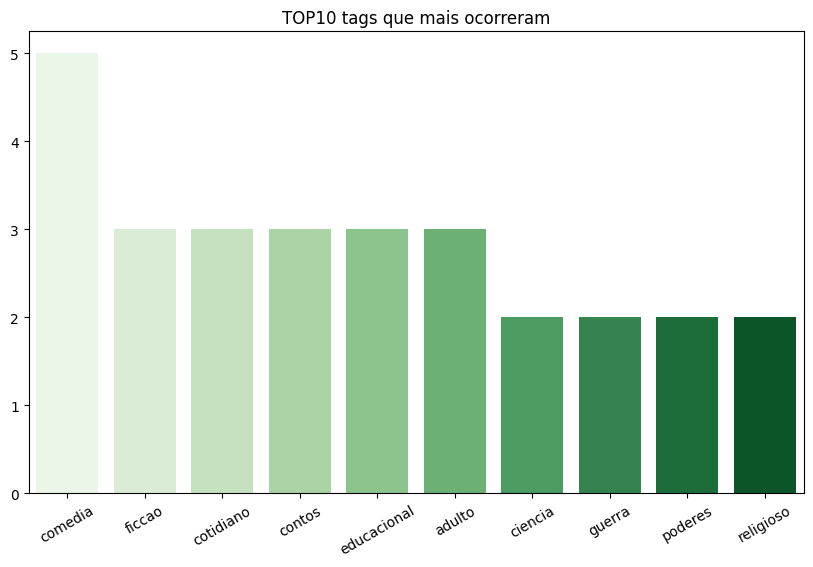

In [15]:
#@title Last Step: Creating a bar plot to visualize the top 10 most frequent tags and their occurrences in the training data labels

# # colocando as palavras em um objeto do tipo lista
# tags_list = list(dict(tags_freq[:10]).keys())
# # colocando as ocorrências em um objeto do tipo lista
# occur_list = list(dict(tags_freq[:10]).values())
# # definindo a área de plotagem
# plt.figure(figsize=(10,6))
# # criando o gráfico
# ax = sns.barplot(x = tags_list, y = occur_list)
# # inserindo o título
# ax.set_title('TOP10 tags que mais ocorreram')
# # rotacionando os rótulos do eixo x
# plt.xticks(rotation=30);

#*******

import matplotlib.pyplot as plt
import seaborn as sns

# Dados
tags_list = list(dict(tags_freq[:10]).keys())
occur_list = list(dict(tags_freq[:10]).values())

# Definindo a área de plotagem
plt.figure(figsize=(10,6))
ax = sns.barplot(x = tags_list, y = occur_list, palette='Greens') #change pallet here
ax.set_title('TOP10 tags que mais ocorreram')
plt.xticks(rotation=30)
plt.show()

# https://matplotlib.org/stable/users/explain/colors/colormaps.html

# Outras opções de gráficos (comentados):

# Gráfico de linha
# plt.figure(figsize=(10,6))
# ax = sns.lineplot(x = tags_list, y = occur_list)
# ax.set_title('TOP10 tags que mais ocorreram')
# plt.xticks(rotation=30)
# plt.show()

# Gráfico de dispersão
# plt.figure(figsize=(10,6))
# ax = sns.scatterplot(x = tags_list, y = occur_list)
# ax.set_title('TOP10 tags que mais ocorreram')
# plt.xticks(rotation=30)
# plt.show()

# Gráfico de barras horizontal
# plt.figure(figsize=(10,6))
# ax = sns.barplot(x = occur_list, y = tags_list, palette='viridis')
# ax.set_title('TOP10 tags que mais ocorreram')
# plt.show()

# Gráfico de pizza (usando matplotlib)
# plt.figure(figsize=(10,6))
# plt.pie(occur_list, labels=tags_list, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(tags_list)))
# plt.title('TOP10 tags que mais ocorreram')
# plt.show()


<ipython-input-16-5496dbae3e69>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=occur_list, y=tags_list, palette='viridis')


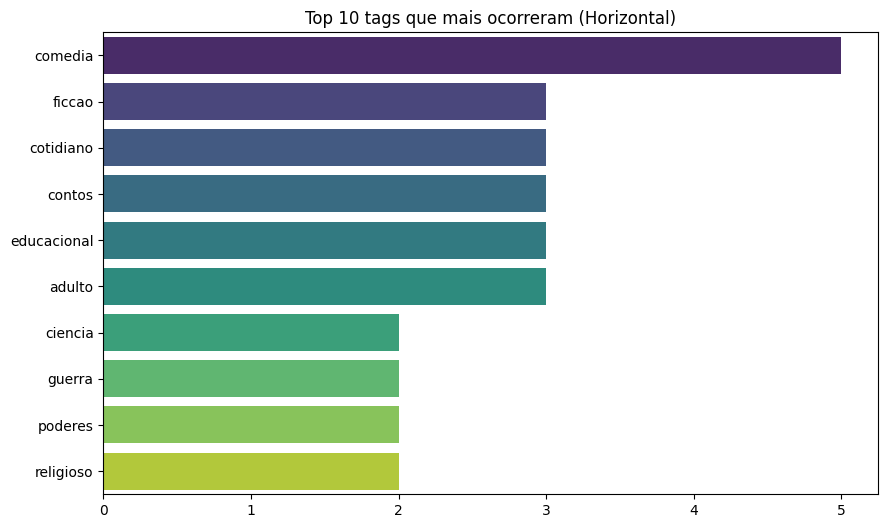

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=occur_list, y=tags_list, palette='viridis')
ax.set_title('Top 10 tags que mais ocorreram (Horizontal)')
plt.show()


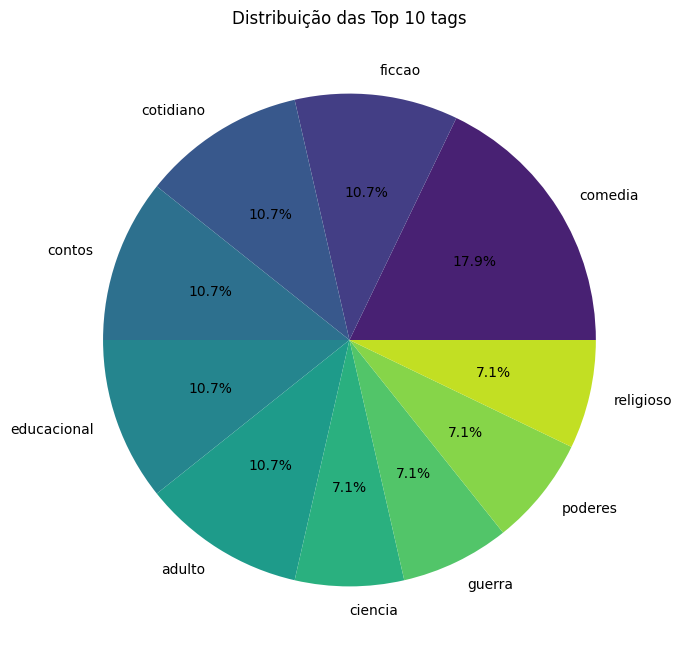

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(occur_list, labels=tags_list, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(tags_list)))
plt.title('Distribuição das Top 10 tags')
plt.show()


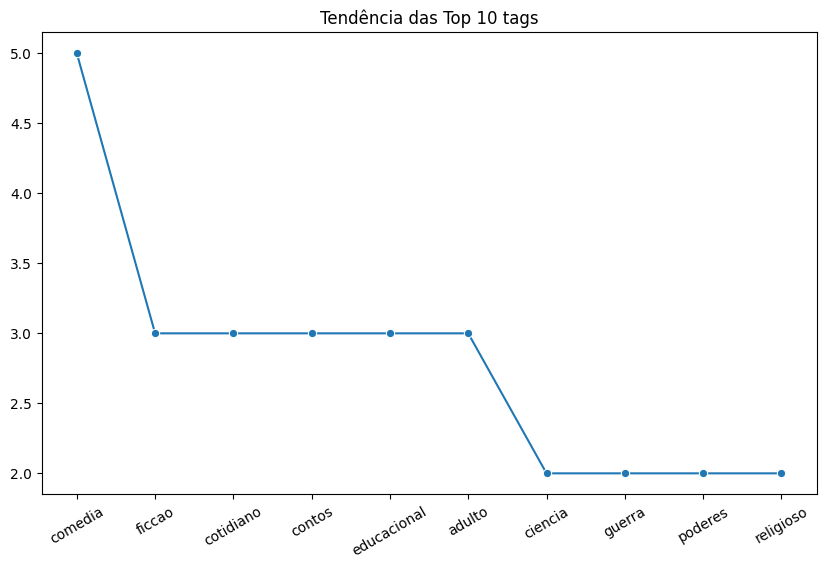

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=tags_list, y=occur_list, marker='o')
ax.set_title('Tendência das Top 10 tags')
plt.xticks(rotation=30)
plt.show()


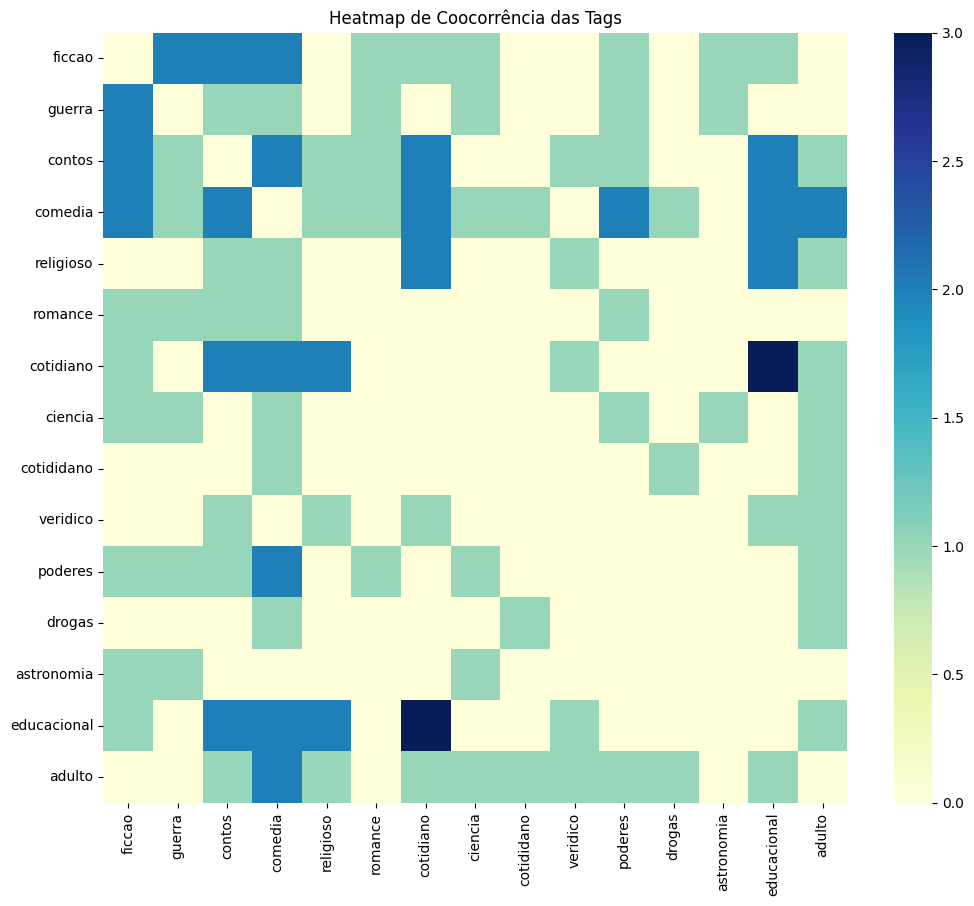

In [19]:
#Para ver como as tags aparecem juntas em várias amostras

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Criando tags a partir dos dados de "train" e "validadtion"
train_tags_set = set([tag for sublist in y_train for tag in sublist])  # Usando "y_train" para obter as tags
val_tags_set = set([tag for sublist in y_val for tag in sublist])    # Usando "y_val" para obter as tags

# Criando uma matriz de coocorrência para as tags
unique_tags = list(train_tags_set.union(val_tags_set))
tag_matrix = np.zeros((len(unique_tags), len(unique_tags)))

# Preenchendo a matriz com contagens de coocorrência
tag_to_index = {tag: i for i, tag in enumerate(unique_tags)}
for tags in y_train:
    for i in range(len(tags)):
        for j in range(i + 1, len(tags)):
            tag_matrix[tag_to_index[tags[i]], tag_to_index[tags[j]]] += 1
            tag_matrix[tag_to_index[tags[j]], tag_to_index[tags[i]]] += 1

# Plotando o Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(tag_matrix, xticklabels=unique_tags, yticklabels=unique_tags, cmap="YlGnBu")
plt.title("Heatmap de Coocorrência das Tags")
plt.show()


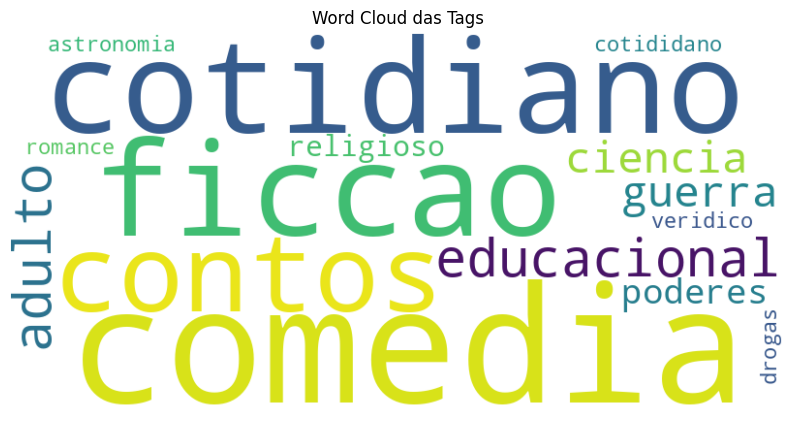

In [20]:
from wordcloud import WordCloud

# Concatenando todas as tags em uma string
tags_text = " ".join([" ".join(tags) for tags in y_train])

# Gerando a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(tags_text)

# Exibindo o gráfico
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud das Tags")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) [0, 1] will be ignored
  warnings.warn(


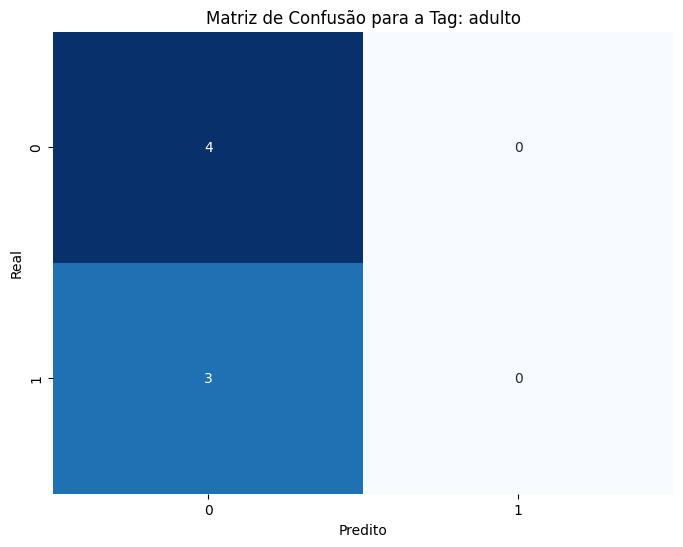

In [21]:
# Importação das bibliotecas necessárias
from sklearn.metrics import multilabel_confusion_matrix  # Função para calcular a matriz de confusão multirrótulo
from sklearn.preprocessing import MultiLabelBinarizer  # Para converter rótulos multirrótulo em formato binário
import seaborn as sns  # Biblioteca para visualização de gráficos
import matplotlib.pyplot as plt  # Biblioteca para criar gráficos
from sklearn.ensemble import RandomForestClassifier  # Algoritmo de classificação Random Forest
from sklearn.feature_extraction.text import TfidfVectorizer  # Para converter texto em dados numéricos

# Criação do modelo de Random Forest para classificação
model = RandomForestClassifier()

# Criação do vetor de transformação TF-IDF para os dados de texto
vectorizer = TfidfVectorizer()

# Transformação dos dados de entrada (X_train) em uma matriz numérica usando o TF-IDF
X_train_vec = vectorizer.fit_transform(X_train)

# Criação do MultiLabelBinarizer para converter rótulos multirrótulo em formato binário
mlb = MultiLabelBinarizer()

# Transformação dos rótulos de treinamento (y_train) em formato binário
y_train_binary = mlb.fit_transform(y_train)

# Treinamento do modelo Random Forest com os dados de entrada transformados (X_train_vec) e rótulos binários (y_train_binary)
model.fit(X_train_vec, y_train_binary)

# Geração das previsões do modelo para os dados de treinamento
y_pred = model.predict(vectorizer.transform(X_train))  # Transforma X_train para o formato adequado antes de prever

# Transformando y_train e y_pred em matrizes binárias
#mlb = MultiLabelBinarizer()
#y_train_binary = mlb.fit_transform(y_train)
y_pred_binary = mlb.transform(y_pred)  # Certifique-se de que y_pred tenha o mesmo formato que y_train

# Calculando a matriz de confusão para todas as tags
conf_matrix = multilabel_confusion_matrix(y_train_binary, y_pred_binary)

# Exibindo a matriz de confusão de uma tag (por exemplo, a primeira tag)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix[0], annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Matriz de Confusão para a Tag: {mlb.classes_[0]}")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

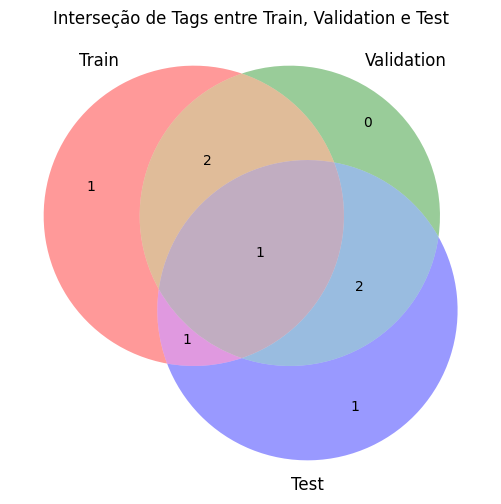

In [22]:
# Instale a biblioteca caso necessário
# !pip install matplotlib-venn

from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Exemplo de conjuntos de tags mais frequentes em três datasets (train, validation, test)
train_tags = set(['sql', 'python', 'data', 'machine', 'learning'])
validation_tags = set(['sql', 'java', 'data', 'deep', 'learning'])
test_tags = set(['python', 'deep', 'learning', 'java', 'html'])

# Criando o diagrama de Venn com três conjuntos
plt.figure(figsize=(8, 6))
venn = venn3([train_tags, validation_tags, test_tags], ('Train', 'Validation', 'Test'))
plt.title("Interseção de Tags entre Train, Validation e Test")
plt.show()
